# Projet EMS & Analyse de données

4modIA - 2021-2022

In [2]:
#Libraries à importer pour pouvoir run la suite du code --> ne pas afficher dans le Rmarkdown
library(corrplot)
library(ggplot2)
library(ellipse)
library(leaps)
library(MASS)
library(corrplot)
library(glmnet)
library(gridExtra)
library(ggfortify)
library(plotly)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(leaps)
library(mclust)
library(cowplot)

## Introdution au jeu de données 

In [3]:
data <- read.table("LifeExpectationData-Etudiants-V2.csv")
attach(data)

data$Country <- as.factor(data$Country)
data$Status <- as.factor(data$Status)

data_quantitative <- data[c(2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19)]

data2014 <- data[data$Year == 2014,]
data_quantitative2014 <- data_quantitative[data_quantitative$Year == 2014,]

### Analyse de forme

Notre projet consiste à analyser un jeu de données issue du référentiel de données de l’Observatoire mondial de la santé (GHO) de l’Organisation mondiale de la santé (OMS). On dispose pour $133$ pays de l’espérance de vie, de facteurs de vaccination, de facteurs de mortalité, de facteurs économiques, de facteurs sociaux, collectés de $2000$ à $2014$.
 
Notre jeu de données `LifeExpectationData-Etudiants.csv` est composé des 19 variables suivantes :

| Nom de la variable      | Signification | Type de variable | 
| ----------- | ----------- | ----------- | 
| *Country*      | Pays       | `Qualitative` | 
| *Year*   | Année considérée        | Quantitative | 
| *Status*  | Statut du pays (Developed or Developing)        | `Qualitative` | 
| *Life.expectancy*  | Espérance de vie en année        | Quantitative | 
| *Adult mortality*   | Taux de mortalité des adultes des deux sexes (probabilité de mourir entre 15 et 60 ans pour 1000 habitants)        | Quantitative | 
| *Infant.deaths*   | Nombre de décès infantiles pour 1000 habitants        | Quantitative | 
| *under.five.deaths*    | Nombre de décès d’enfants de moins de cinq ans pour 1000 habitants        | Quantitative | 
| *Alcohol*   | Consommation d’alcool enregistrée par habitant (15+) (en litres d’alcool pur)        | Quantitative | 
| *BMI*  | Indice de masse corporelle moyen de l’ensemble de la population        | Quantitative | 
| *thinness..1.19.years*    | Prévalence de la maigreur chez les enfants et adolescents de 10 à 19 ans (%)        | Quantitative | 
| *thinness..5.9.years*    | Prévalence de la maigreur chez les enfants et adolescents de 5 à 9 ans (%)        | Quantitative | 
| *Measles*    | Nombre de cas de rougeole signalés ~pour 1000 habitants~        | Quantitative | 
| *Total.expenditure*   | Dépenses publiques générales de santé en pourcentage des dépenses publiques totales (%)        | Quantitative | 
| *Hepatitis.B*   | Couverture vaccinale contre l’hépatite B chez les enfants de 1 an (%)        | Quantitative | 
| *Polio*   | Couverture vaccinale contre la polio chez les enfants de 1 an (%)        | Quantitative | 
| *Diphtheria*   | Couverture vaccinale contre l’anatoxine diphtérique, le tétanos et la coqueluche chez les enfants de 1 an (%)        | Quantitative | 
| *GDP* (PIB)    | Produit Intérieur Brut par habitant (en USD)        | Quantitative | 
| *Schooling*   | Nombre d’années de scolarité (années)        | Quantitative | 
| *Population*   | Population du pays        | Quantitative | 

Ainsi on a donc **1646 individus** avec **19 variables**.

Parmis les **19 variables**, **16** sont **quantitatives** et **2** **qualitatives**.

Certaines données sont manquante, par exemple nous il n'y a aucune données pour le Perou en 2001.

In [4]:
head(data)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,GDP,Population,thinness..1.19.years,thinness.5.9.years,Schooling
,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2014,Developing,59.9,271,64,0.01,62,492,18.6,86,58,8.18,62,612.6965,33.37,17.5,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,64,430,18.1,89,62,8.13,64,631.7450,32.27,17.7,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,67,2787,17.6,93,67,8.52,67,669.9590,31.16,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,68,3013,17.2,97,68,7.87,68,635.3723,30.12,18.2,18.2,9.5
5,Afghanistan,2010,Developing,58.8,279,74,0.01,66,1989,16.7,102,66,9.20,66,553.3289,29.19,18.4,18.4,9.2
6,Afghanistan,2009,Developing,58.6,281,77,0.01,63,2861,16.2,106,63,9.42,63,445.8933,28.39,18.6,18.7,8.9


In [5]:
summary(data)

        Country          Year             Status     Life.expectancy
 Afghanistan:  15   Min.   :2000   Developed : 284   Min.   :44.00  
 Albania    :  15   1st Qu.:2005   Developing:1362   1st Qu.:64.40  
 Armenia    :  15   Median :2008                     Median :71.70  
 Austria    :  15   Mean   :2008                     Mean   :69.31  
 Belarus    :  15   3rd Qu.:2011                     3rd Qu.:75.00  
 Belgium    :  15   Max.   :2014                     Max.   :89.00  
 (Other)    :1556                                                   
 Adult.Mortality infant.deaths        Alcohol        Hepatitis.B
 Min.   : 53.0   Min.   :   0.00   Min.   : 0.010   Min.   : 5  
 1st Qu.:123.0   1st Qu.:   1.00   1st Qu.: 1.323   1st Qu.:78  
 Median :174.0   Median :   3.00   Median : 4.160   Median :90  
 Mean   :200.4   Mean   :  32.57   Mean   : 4.859   Mean   :84  
 3rd Qu.:247.8   3rd Qu.:  22.00   3rd Qu.: 7.558   3rd Qu.:96  
 Max.   :730.0   Max.   :1600.00   Max.   :17.870   Max.  

### Préparation des données

#### Exploration de données

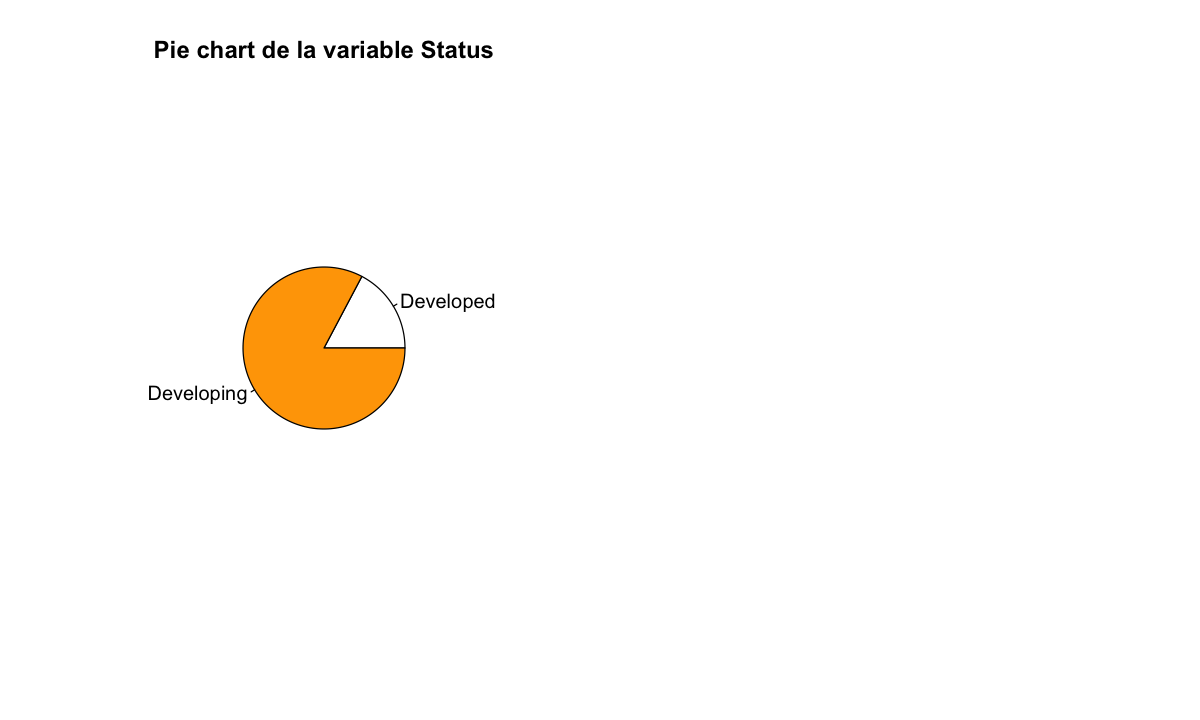

In [6]:
par(mfrow = c(1, 2))
options(repr.plot.width = 10, repr.plot.height = 6)
pie(table(data$Status), main="Pie chart de la variable Status", col=c("white", "orange"))

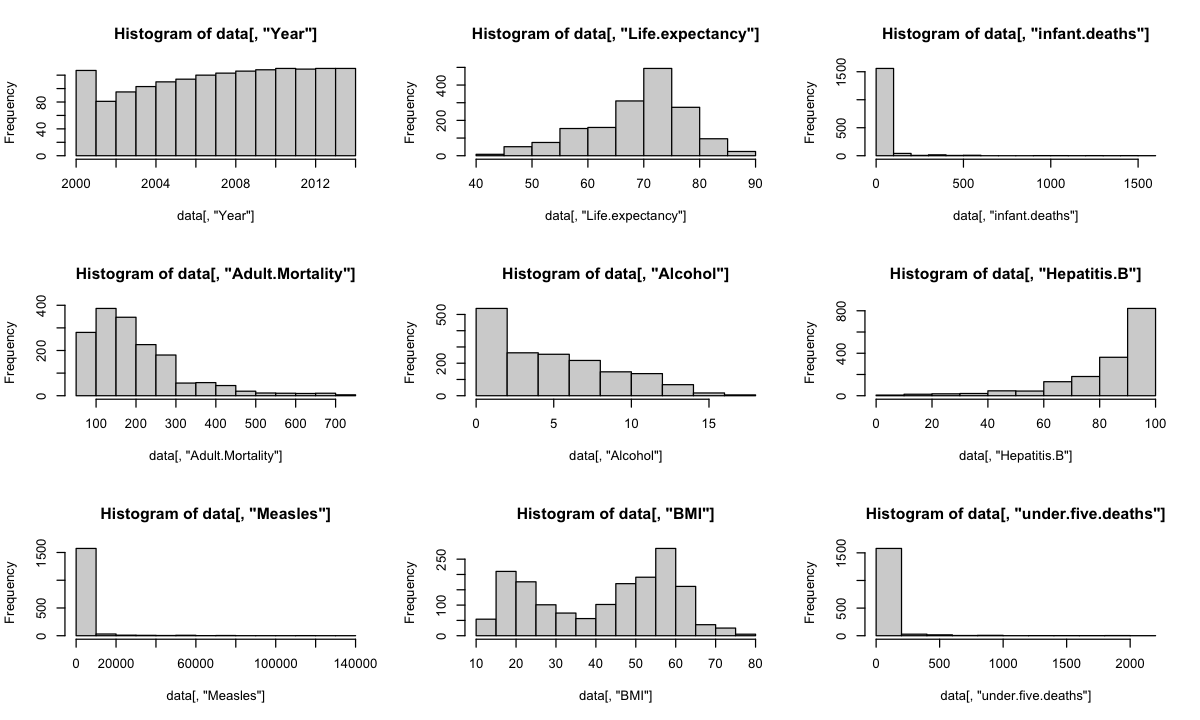

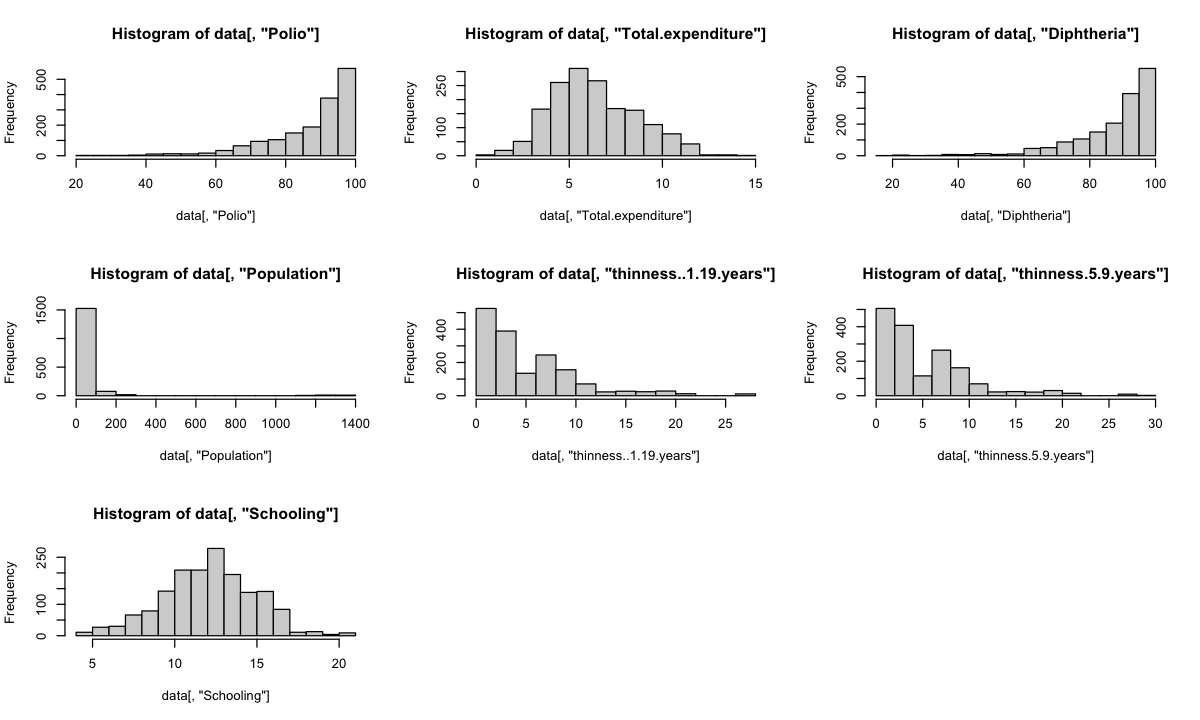

In [7]:
par(mfrow = c(3, 3))
options(repr.plot.width = 10, repr.plot.height = 6)
hist(data[, "Year"])
hist(data[, "Life.expectancy"])
hist(data[, "infant.deaths"])
hist(data[, "Adult.Mortality"])
hist(data[, "Alcohol"])
hist(data[, "Hepatitis.B"])
hist(data[, "Measles"])
hist(data[, "BMI"])
hist(data[, "under.five.deaths"])
hist(data[, "Polio"])
hist(data[, "Total.expenditure"])
hist(data[, "Diphtheria"])
hist(data[, "Population"])
hist(data[, "thinness..1.19.years"])
hist(data[, "thinness.5.9.years"])
hist(data[, "Schooling"])

On remarque plusieurs chose:
- Toutes les années ne sont pas autant représenté, il manque des combinaison *Country*, *Year*. On semble avoir des données pour une grande partie des pays en 2014, on étudieras donc parfois les données pour cette années la spécifiquement.
- Il semble y avoir des disparités d'échelles importante pour les valeurs prise par certaines variables, typiquement pour: *infant.deaths*, *Measles*, *under.five.deaths* et *Population*. Des transformations serait la bienvenue (voir partie #Transformation)  !
- *thinness..1.19.years* et *thinness.5.9.years* semble avoir une distribution très très proche, ce qui pourrais être un indice que c'est deux variables sont redondantes (et de même échelles dans le cas présent). Peut être que d'autre variable sont aussi redondante ? Voir la partie #Variable Redondante
- Certaines variables pourrais avoir une distribution plus gaussiennes via une transormations. Voir la partie #Transformation

On peut essayer d'affiner notre intuition vis a vis des variables potentiellement redondantes avec un `corrplot`

Warning message in cor(data_quantitative2014):
“l'écart type est nul”


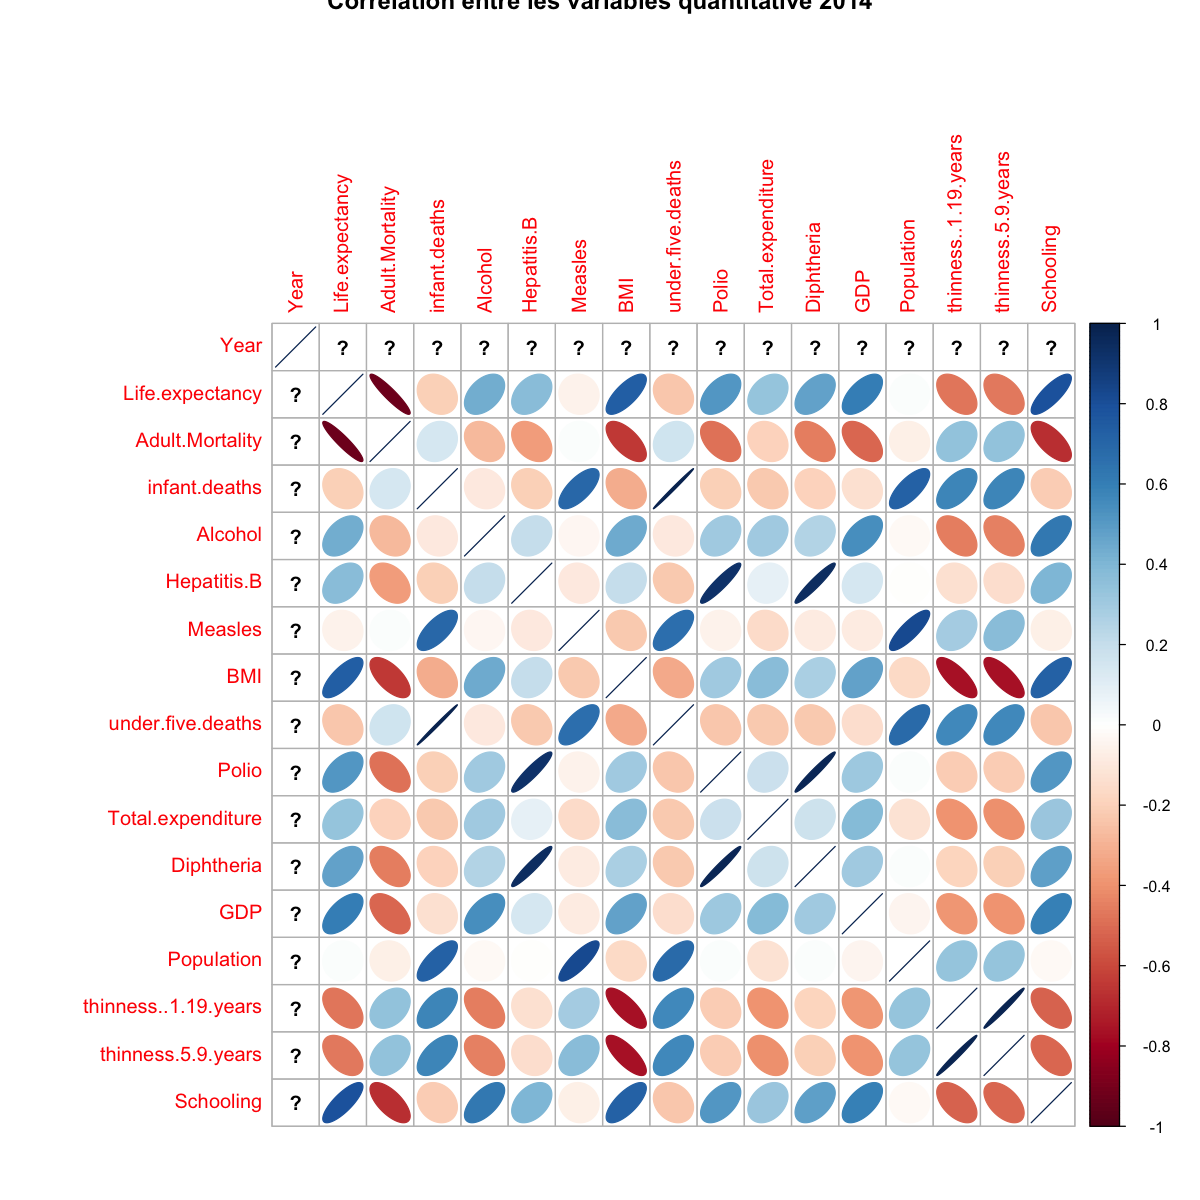

In [9]:
options(repr.plot.width = 10, repr.plot.height = 10)
corrplot(cor(data_quantitative2014),
    method = "ellipse",
    main = "Corrélation entre les variables quantitative 2014")

Nos meilleurs quandidat en terme de variables redondantes serait:
- *thinness..1.19.years* et *thinness.5.9.years* (très logique)
- *Adult.Mortality* et *Life.expectancy* (logique)
- *under.five.deaths* et *infant.deaths* (très logique)
- *Polio* et *Hepatitis.B* et *Diphtheria* (logique)

#### Variable redondante

In [10]:
res.pca <- prcomp(data_quantitative, scale = TRUE)

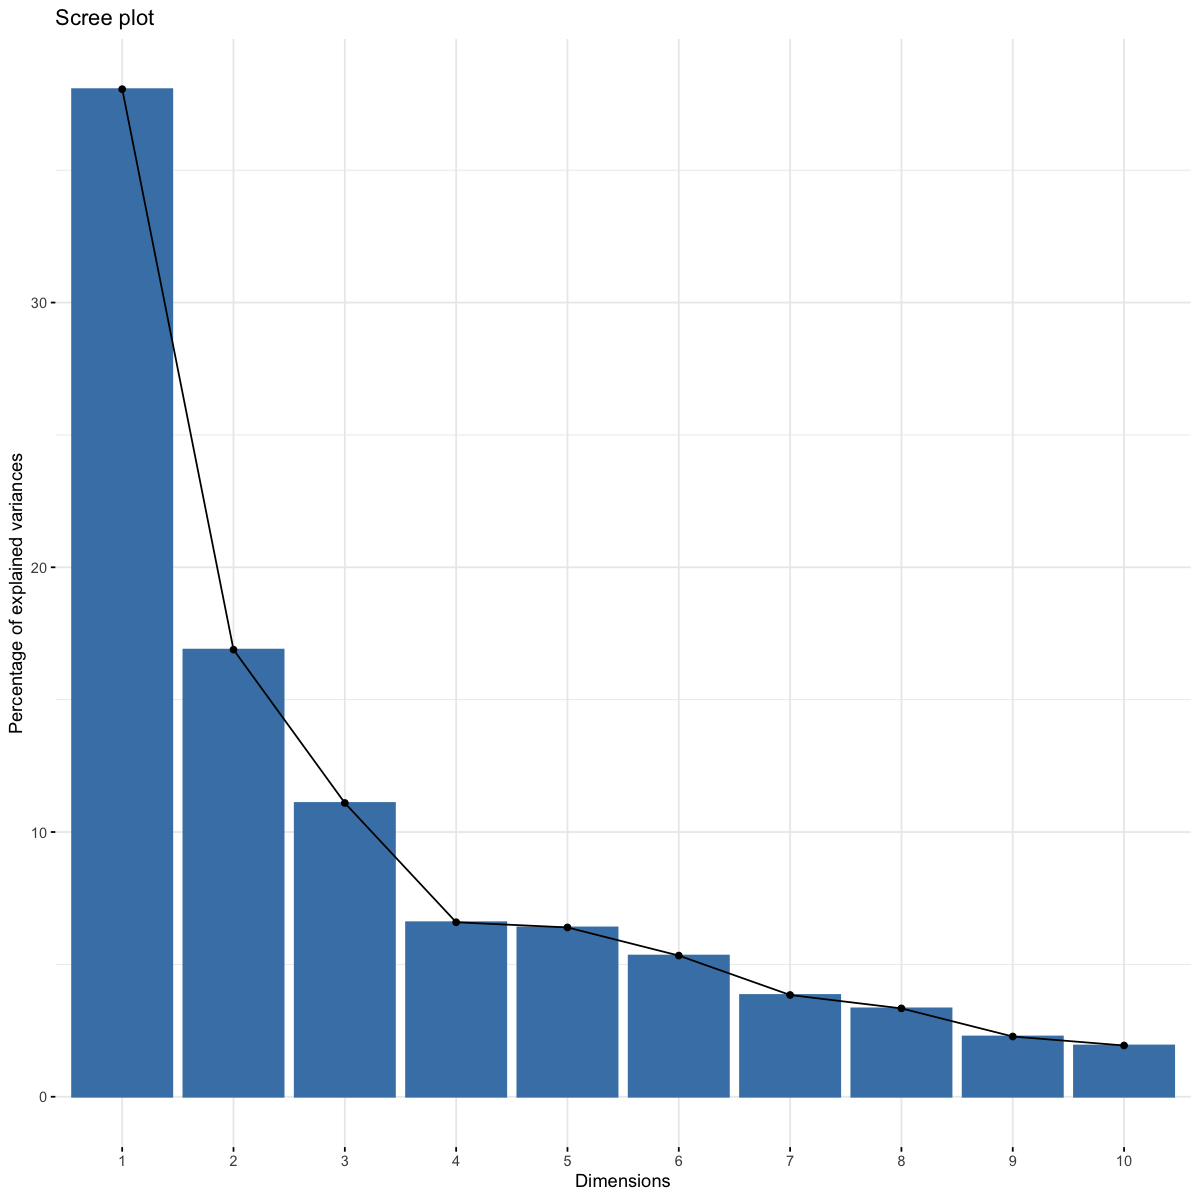

In [11]:
fviz_eig(res.pca)

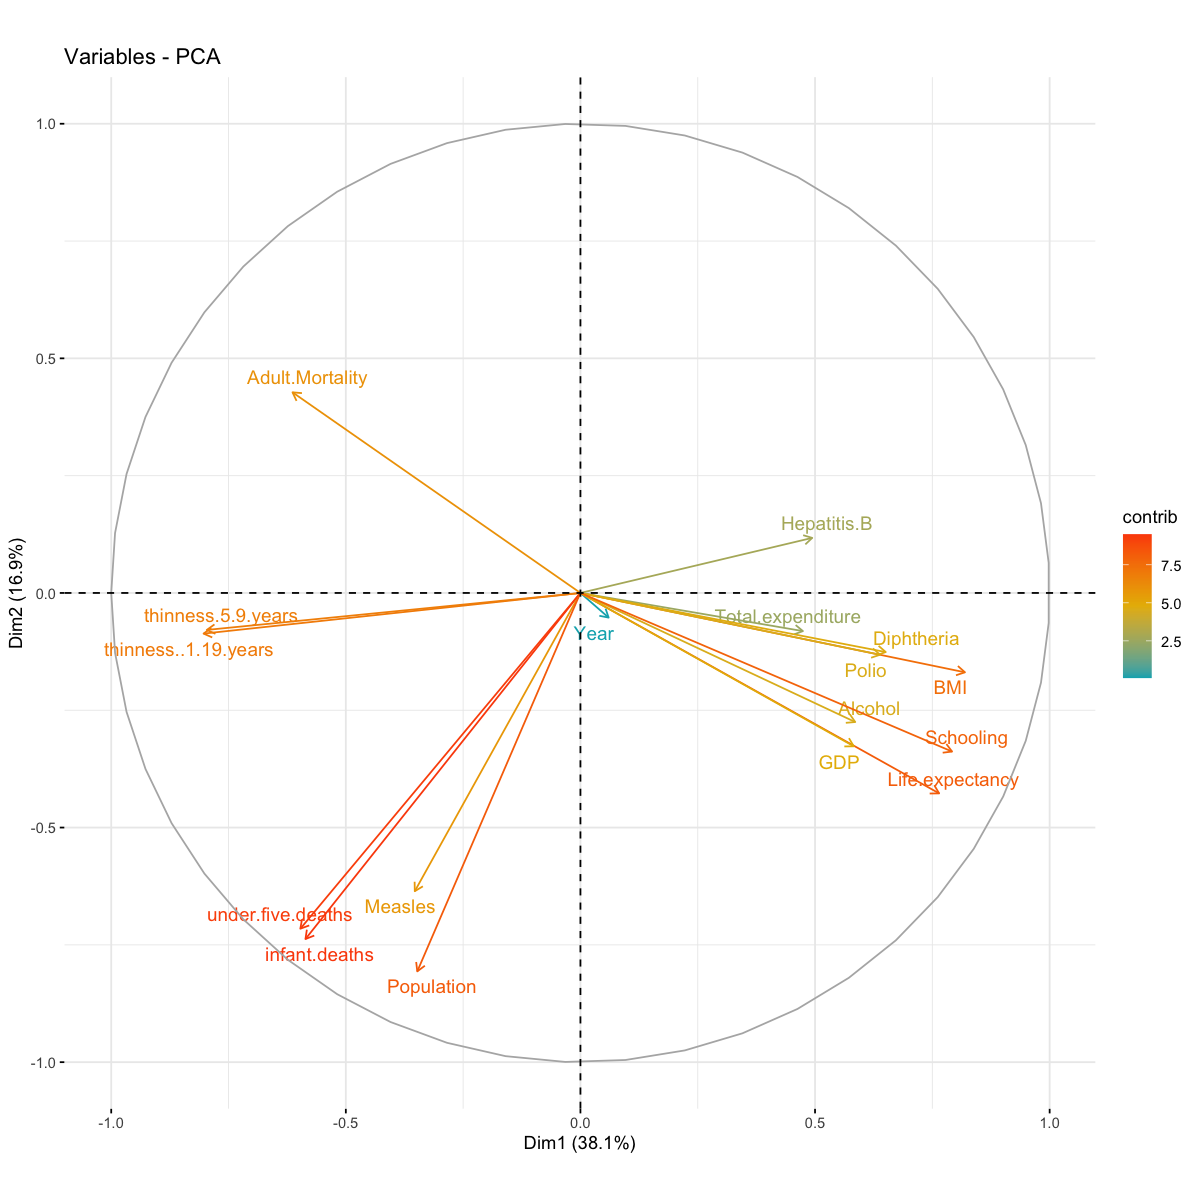

In [12]:
fviz_pca_var(res.pca,
             axes = c(1, 2),
             col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     
             )

En utilisant seulement les deux permières dimensions de la PCA (inertie de $16.9+38.1 = 55\%$) on a:
- `thinness.5.9.years` et `thinness.1.19.years` semble être redondantes pour la PCA (ce qui est logique).
- `under.five.deaths` et `infant.deaths` aussi (logique aussi).
- `Diphtheria`, `Polio` et `BMI`
- `GDP` et `Life.expectancy`
- `Alcohol` et `Schooling` aussi bien qu'il soit fortement probable que ce ne soit pas un relation de corrélation mais simplement de causalité.

Cependant pour les deux dernières elle semble être moins bien représentable dans cette espace (longeur de fleche plus faibles)

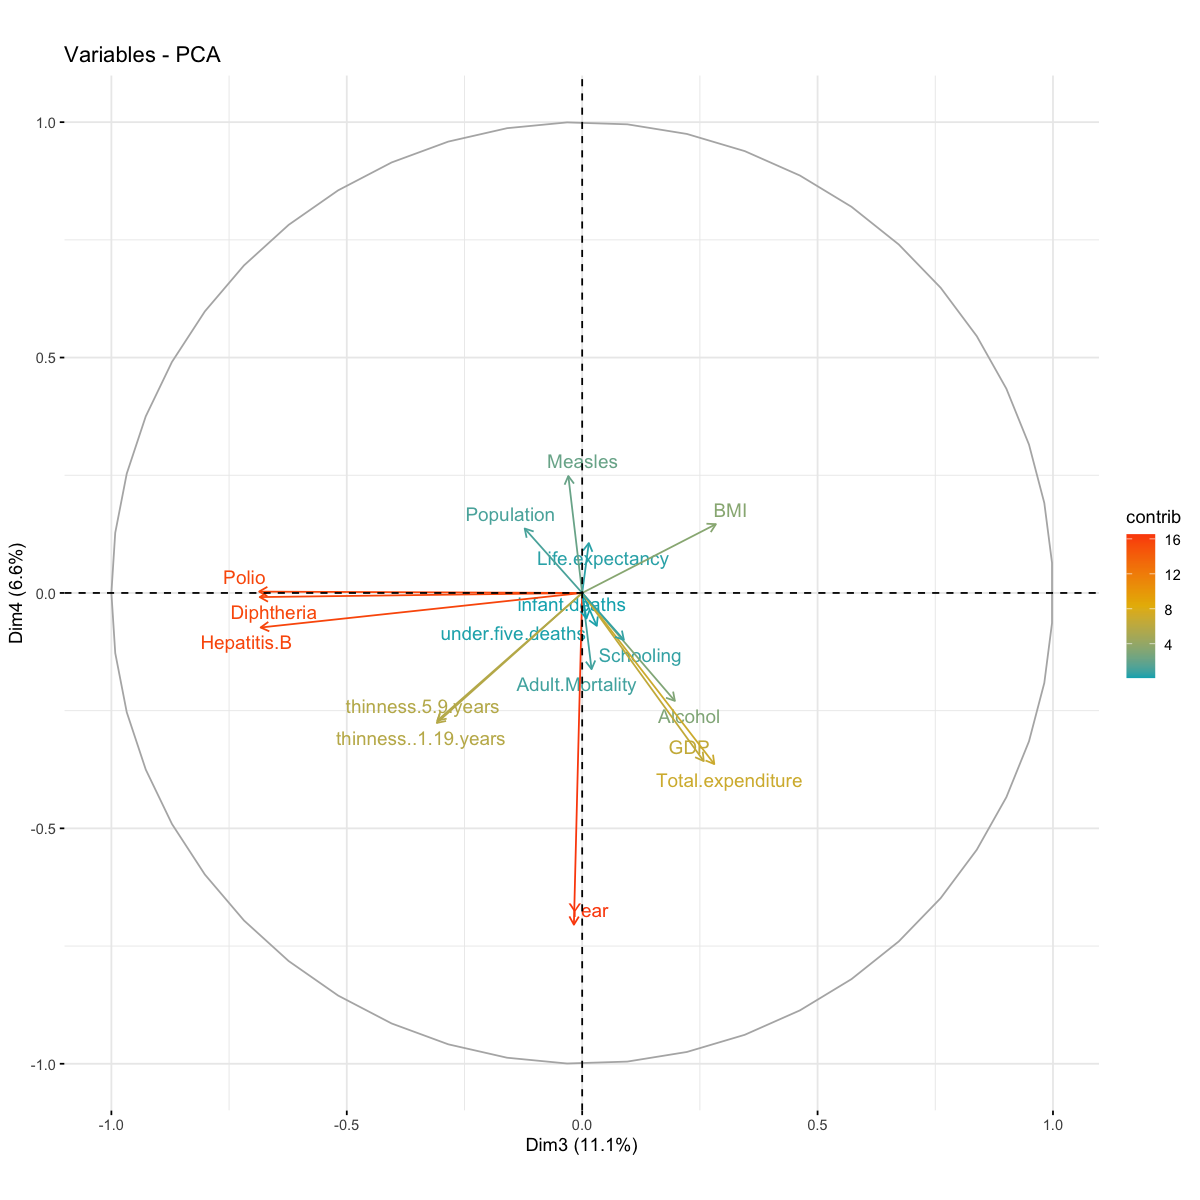

In [13]:
fviz_pca_var(res.pca,
             axes = c(3, 4),
             col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     
             )

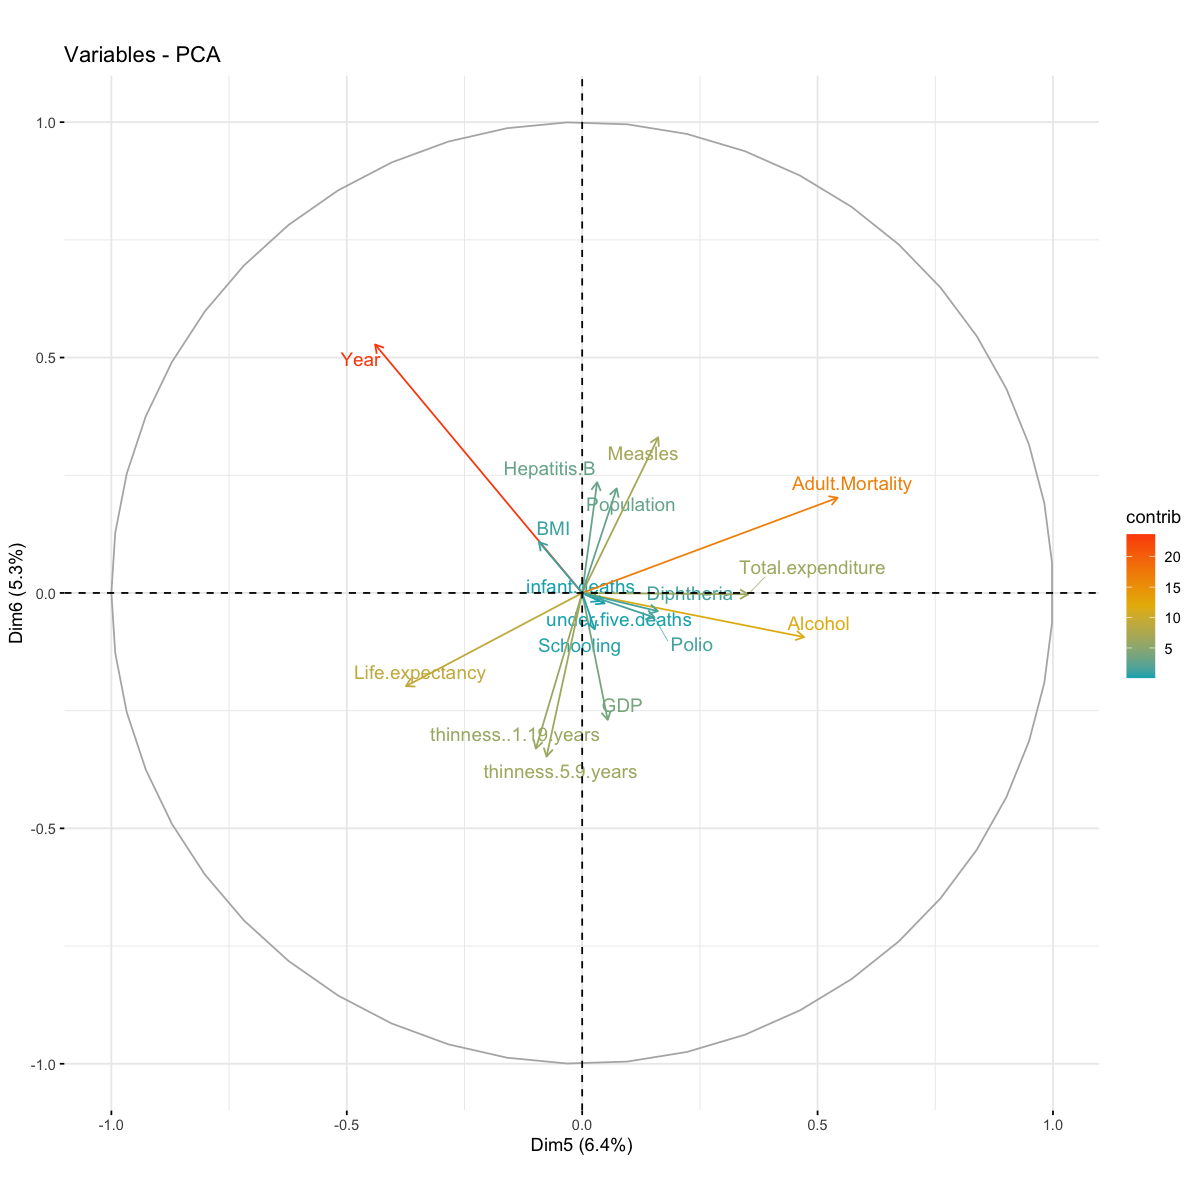

In [14]:
fviz_pca_var(res.pca,
             axes = c(5, 6),
             col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     
             )

En utilisant les quatres dimensions suivantes de la PCA (inertie de $11.1+6.6 = 17.7\%$ et de $6.4+5.3 = 11.7\%$), on confirme la relation des `thinness`, de même pour les `infant.deaths`. Pour les trois autres cela semble moins évidant clairement moins évident, typiquement `Polio` est opposé à `Hepatitis.B` et `Measles` pour la *Dim6* ($5.3\%$), de même entre `Life.expectancy` et `GDP` pour la *Dim5* ($6.4\%$).

- On fusionne donc `thinness.5.9.years` avec `thinness.1.19.years` pour former `thinness.5.19.years` : 
$$thinness.5.19.years = 
\frac{thinness.5.9.years + thinness.1.19.years}{2}$$ (on considère le même nombre d'individus dans les deux pourcentages)


- De même pour `under.five.deaths` avec `infant.deaths` pour former `child.deaths` : 
$$child.deaths = 
\frac{under.five.deaths + infant.deaths}{2}$$ (on considère le même nombre d'individus dans les deux pourcentages)

Les autres ne seront pas fusionner car trop peu redondantes, et cela induirais une perte d'interprétabilités

In [148]:
new_data = data[c(1,2,3,4,5,7,8,9,10,12,13,14,15,16,19)] #Dataset sans 6, 11, 17, 18

In [149]:
new_data["thinness.5.19.years"] = 0.5*data["thinness.5.9.years"] + 0.5*data["thinness..1.19.years"]
new_data["child.deaths"] = 0.5*data["under.five.deaths"] + 0.5*data["infant.deaths"]

In [150]:
# PCA du nouveau dataset
# new_data_quantitative = new_data[c(2,4,5,6,7,8,9,10,11,12,13,14,15,16,17)]
# res.new_pca <- prcomp(new_data_quantitative, scale = TRUE)

# fviz_pca_var(res.new_pca,
#              axes = c(1, 2),
#              col.var = "contrib", 
#              gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
#              repel = TRUE     
#              )

#Calcul des corrélations pour vérifier que l'on a pas de perte d'information
cor(new_data["thinness.5.19.years"], data["thinness.5.9.years"])
cor(new_data["thinness.5.19.years"], data["thinness..1.19.years"])
cor(new_data["child.deaths"], data["under.five.deaths"])
cor(new_data["child.deaths"], data["infant.deaths"])

,thinness.5.9.years
thinness.5.19.years,0.990761


,thinness..1.19.years
thinness.5.19.years,0.9906233


,under.five.deaths
child.deaths,0.9994385


,infant.deaths
child.deaths,0.9989795


#### Transformation

In [152]:
new_data$Measles <- new_data$Measles / (new_data$Population * 1000) #Par population

new_data$Measles <- log10(new_data$Measles + 1)
new_data$GDP <- log10(new_data$GDP)
new_data$Population <- log10(new_data$Population)
new_data$child.deaths <- log10(new_data$child.deaths + 1)
new_data$Hepatitis.B <- log10(100-new_data$Hepatitis.B)
new_data$Diphtheria <- log10(100-new_data$Diphtheria)
new_data$Polio <- log10(100-new_data$Polio)

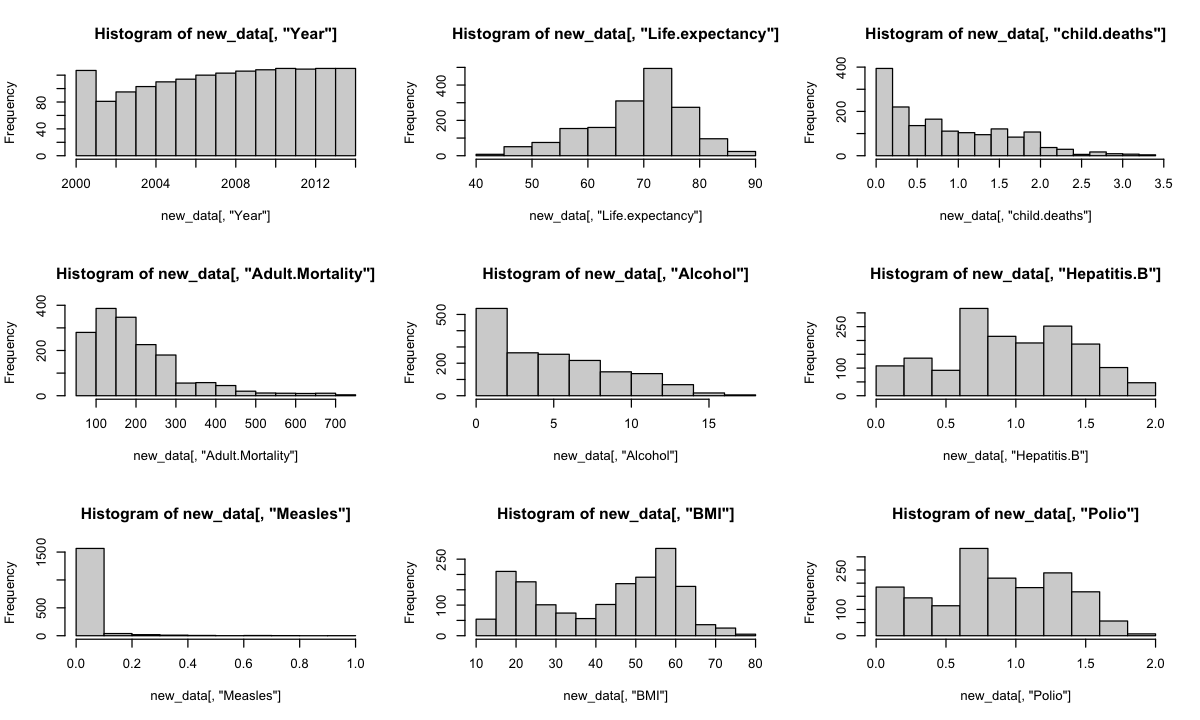

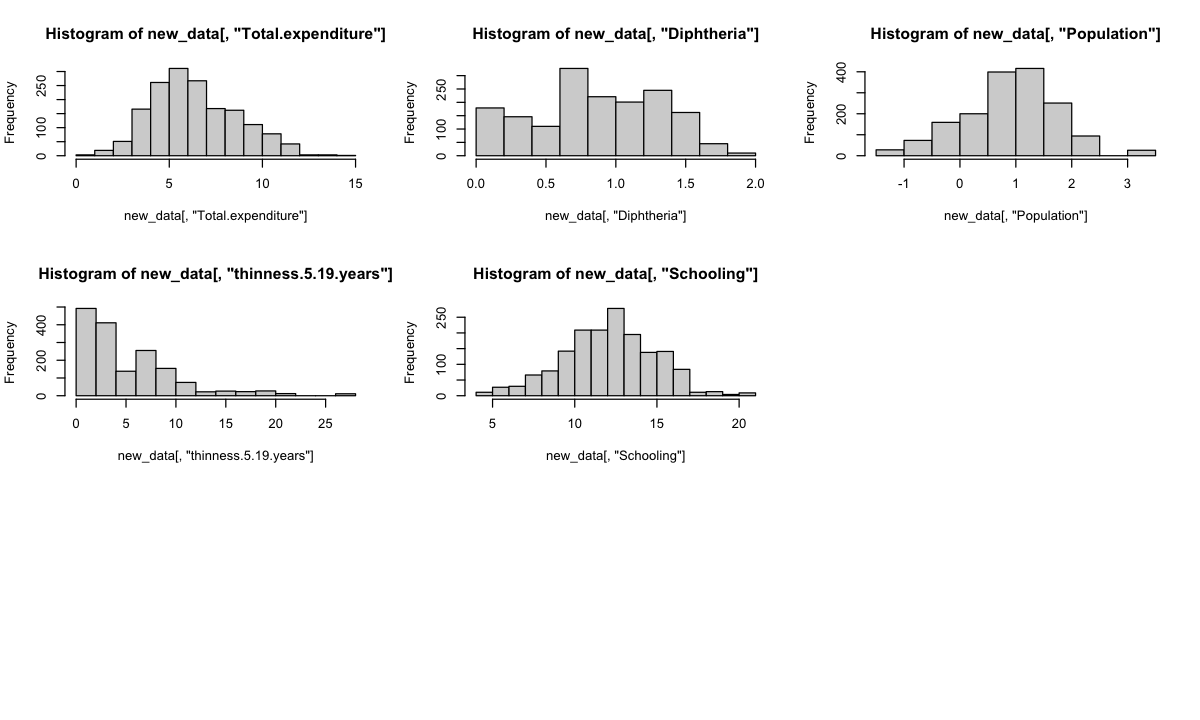

In [154]:
par(mfrow = c(3, 3))
options(repr.plot.width = 10, repr.plot.height = 6)
hist(new_data[, "Year"])
hist(new_data[, "Life.expectancy"])
hist(new_data[, "child.deaths"])
hist(new_data[, "Adult.Mortality"])
hist(new_data[, "Alcohol"])
hist(new_data[, "Hepatitis.B"])
hist(new_data[, "Measles"])
hist(new_data[, "BMI"])
hist(new_data[, "Polio"])
hist(new_data[, "Total.expenditure"])
hist(new_data[, "Diphtheria"])
hist(new_data[, "Population"])
hist(new_data[, "thinness.5.19.years"])
hist(new_data[, "Schooling"])

In [159]:
new_data_quantitative = new_data[c(2,4,5,6,7,8,9,10,11,12,13,14,15,16,17)]

new_data2014 = new_data[new_data$Year==2014,]
new_data_quantitative2014 = new_data_quantitative[new_data_quantitative$Year==2014,]

### Visualisation réduite des données

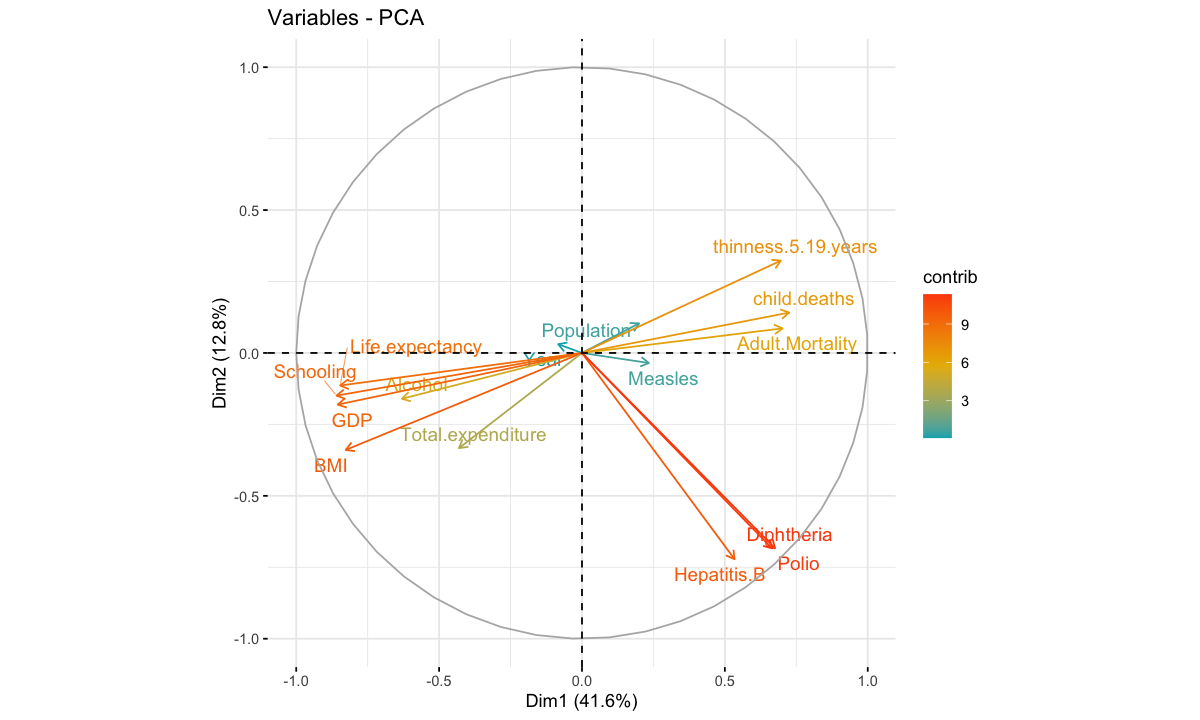

In [168]:
res.new_pca <- prcomp(new_data_quantitative, scale = TRUE)

fviz_pca_var(res.new_pca,
             axes = c(1, 2),
             col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     
             )


#### Faire des visualisation

## Étude de l'Espérance de vie en 2014

### Étude de l'Espérance de vie en 2014

### Modélisation de l'espérance de vie en 2014 avec les taux de mortalité